In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 1. Load dataset
df = pd.read_csv('digit_data.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 2. Convert the data given in the dataFrame into a NumPy array
data = np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
# 3. Query the shape of the array
data_shape = data.shape
data_count = data_shape[0]
features = data_shape[1]

data_count, features

(42000, 785)

In [5]:
# 4. Shuffle the contents of the array 
np.random.shuffle(data)

In [6]:
# 5. Use first 1000 images of the dataset as the test set and remaining as the train set
test = data[:1000]
train = data[1000:]

In [7]:
# For test set -- Transpose the data (Take rows as the labels of the test set and rows as the features)
test = test.T
X_test = test[1:, :]
y_test = test[0,:]
X_test = X_test / 255 # Color normalization


test.shape, X_test.shape, y_test.shape 

((785, 1000), (784, 1000), (1000,))

In [8]:
# For train set -- Transpose the data (Take rows as the labels and rows as the features)
train = train.T
X_train = train[1:, :]
y_train = train[0]

X_train = X_train / 255

train.shape, X_train.shape, y_train.shape 

((785, 41000), (784, 41000), (41000,))

In [9]:
# Generate a random index in the range dedicated for training images
index = np.random.randint(0, len(train),1)
index

array([513])

In [10]:
train.shape

(785, 41000)

In [11]:
train[index].shape

(1, 41000)

In [12]:
train_ = train.T
new_img = train_[index, :-1]
new_img.shape

new_image = new_img.reshape(28,-1)
new_image.shape

(28, 28)

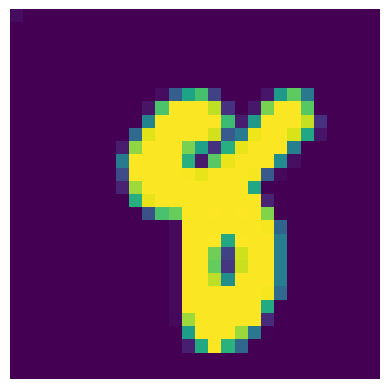

In [13]:
# X_test_2d = new_img.reshape(28,-1)
# X_test_2d.shape
plt.imshow(new_image) 
plt.axis('off')
plt.show()

In [14]:
def kaiming_normal(w_shape):
    n_input = w_shape[1]
    var = 2.0 / n_input
    sd = np.sqrt(var)
    return np.random.normal(0, sd, size = w_shape)

In [15]:
def initial_params():    
    W1 = kaiming_normal((512,784))
    W2 = kaiming_normal((128,512))
    W3 = kaiming_normal((10,128))
    b1 = np.random.normal(0, 1, size=(512,1))
    b2 = np.random.normal(0, 1, size=(128,1))
    b3 = np.random.normal(0, 1, size=(10,1))

    # print(W1.shape, W2.shape, b1.shape, b2.shape)
    return W1, b1, W2, b2, W3, b3

_, _, W2, _, _, _  = initial_params()
W2[:100]

array([[-0.02183591,  0.01881578,  0.04980322, ..., -0.08628163,
        -0.01338915, -0.01675716],
       [-0.03156903, -0.00310548,  0.04166284, ...,  0.05954084,
         0.08834379,  0.02652734],
       [-0.01366368,  0.12797553, -0.02021329, ..., -0.12619134,
         0.02466674,  0.02360802],
       ...,
       [-0.04736057, -0.00626342, -0.02399994, ...,  0.00841957,
        -0.04388666, -0.08103141],
       [ 0.04467687, -0.01456679,  0.15698544, ...,  0.09803614,
         0.03464975, -0.06096787],
       [-0.07213136,  0.0264863 , -0.05878669, ...,  0.03658741,
        -0.06331096,  0.02341836]])

In [16]:
def LeakyReLU_fn(vector, alpha=0.01):
    return np.where(vector > 0, vector, alpha * vector)

# Example usage
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
leaky_relu = LeakyReLU_fn(vector)

vector, leaky_relu

(array([[ 0.45009305],
        [-0.33946252],
        [-0.24214411],
        [-0.28024147],
        [ 0.3470429 ],
        [ 0.40516655],
        [ 0.15552892],
        [ 0.02474735],
        [ 0.11969191],
        [-0.127863  ]]),
 array([[ 0.45009305],
        [-0.00339463],
        [-0.00242144],
        [-0.00280241],
        [ 0.3470429 ],
        [ 0.40516655],
        [ 0.15552892],
        [ 0.02474735],
        [ 0.11969191],
        [-0.00127863]]))

In [17]:
def d_LeakyReLU(vector, alpha=0.01):
    return np.where(vector > 0, 1.0, alpha)


vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
d_leaky_relu = d_LeakyReLU(vector)

vector, d_leaky_relu

(array([[ 0.35768836],
        [ 0.26138854],
        [-0.14408941],
        [ 0.20385501],
        [-0.32765258],
        [-0.07503714],
        [ 0.19165418],
        [ 0.1205846 ],
        [-0.27276881],
        [ 0.27934054]]),
 array([[1.  ],
        [1.  ],
        [0.01],
        [1.  ],
        [0.01],
        [0.01],
        [1.  ],
        [1.  ],
        [0.01],
        [1.  ]]))

In [18]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000])
vector

array([-0.42125715,  0.3657498 , -0.40599888, -0.49617081, -0.26594179,
        0.04403699,  0.03381547, -0.21303209, -0.30146462,  0.23888194,
        0.        ])

(-0.5, 0.5)

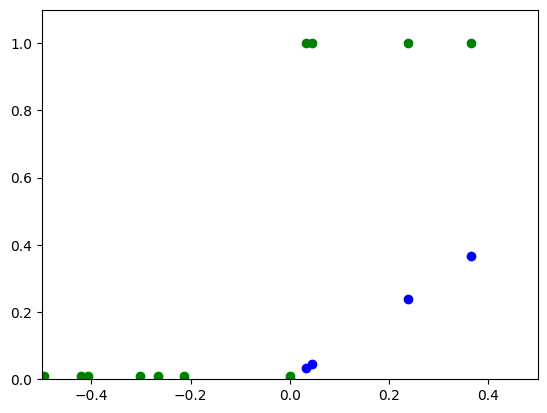

In [19]:
leaky_relu = LeakyReLU_fn(vector)
d_leaky_relu = d_LeakyReLU(vector)

plt.scatter(vector, leaky_relu, c='blue')
plt.scatter(vector, d_leaky_relu, c='green')
plt.ylim(0.0, 1.1)
plt.xlim(-0.5, 0.5)

In [20]:
def sigmoid(vector):
    return 1 / (1 + np.exp(-vector))

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
sigm = sigmoid(vector)
vector, sigm

(array([[ 0.18135956],
        [ 0.04937561],
        [-0.27457713],
        [ 0.03481644],
        [ 0.32523913],
        [ 0.22732354],
        [-0.44719971],
        [-0.29578109],
        [-0.4801264 ],
        [-0.1456053 ]]),
 array([[0.54521602],
        [0.5123414 ],
        [0.43178376],
        [0.50870323],
        [0.58060053],
        [0.55658741],
        [0.39002677],
        [0.42658915],
        [0.38222228],
        [0.46366285]]))

In [21]:
# def df_softmax(vector):
#     d_softmax = softmax_fn(vector) * (1 - softmax_fn(vector))

#     return d_softmax

# vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
# d_softmax = softmax_fn(vector)
# vector, d_softmax

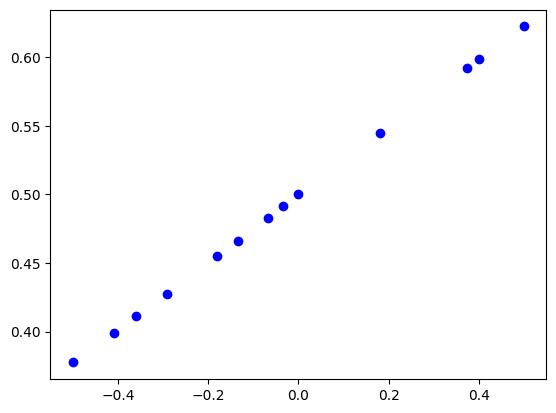

In [22]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000, -0.5, 0.5])
vector

sigm = sigmoid(vector)
# d_softmax = df_softmax(vector)

plt.scatter(vector, sigm, c='blue')
# plt.scatter(vector, d_softmax, c='green')


In [23]:
def forward_prop(W1, b1, W2, b2, W3, b3, A0):
    Z1 = np.dot(W1, A0) + b1
    A1 = LeakyReLU_fn(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = LeakyReLU_fn(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    return Z1, A1, Z2, A2, Z3, A3

In [24]:
# One hot encoding
def one_hot_encoding(Y, num_classes):
    num_classes = int(num_classes)  # Ensure num_classes is an integer
    encoded_mat = np.zeros((num_classes, len(Y)))
    for i in range(len(Y)):
        class_index = int(Y[i])
        encoded_mat[class_index, i] = 1
    return encoded_mat

y_train = one_hot_encoding(y_train, num_classes=10)
y_train.shape
y_test = one_hot_encoding(y_test, num_classes=10)
y_test.shape


(10, 1000)

In [25]:
# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, A3, Z3, W3, A0, y_train, lambda_reg):
    m = A0.shape[1]
    dZ3 = A3 - y_train
    dZ2 = np.dot(W3.T, dZ3) * d_LeakyReLU(Z2)
    dZ1 = np.dot(W2.T, dZ2) * d_LeakyReLU(Z1)

    dW1 = (1 / m) * np.dot(dZ1, A0.T) + (lambda_reg / m) * W1
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambda_reg / m) * W2
    dW3 = (1 / m) * np.dot(dZ3, A2.T) + (lambda_reg / m) * W3
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

In [26]:
def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate= 0.01):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3       

    return W1, b1, W2, b2, W3, b3

In [27]:
def obtain_predictions(vector):  # Corrected parameter name
    return np.argmax(vector, axis=0)


In [28]:
%pip install scikit-learn
from sklearn.metrics import accuracy_score


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [29]:
def accuracy_sc(y_pred, y_actual): # Vectors  
    num_samples = y_actual.shape[1]

    if y_pred.ndim ==2:
        pred_label = obtain_predictions(y_pred)
    else:
        pred_label = y_pred
        
    if y_actual.ndim == 2:
        actual_label = obtain_predictions(y_actual)
    else:
        actual_label = y_actual
    
    num_correct = np.sum(pred_label == actual_label)
    # print(num_correct)
    return num_correct / num_samples

In [30]:
y_train.shape

(10, 41000)

In [31]:
def gradient_descent(X_train, y_train, learning_rate, num_iterations, lambda_reg):
    W1, b1, W2, b2, W3, b3 = initial_params()

    accuracy_list = []

    for i in range(num_iterations+1):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_train)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, W1, W2, A3, Z3, W3, X_train, y_train, lambda_reg)
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)

        if i%5==0:
            accuracy = accuracy_sc(A3,y_train)
            accuracy_list.append((i,accuracy))
            print(f"Iteration: {i} \t Accuracy: {accuracy:.5f}")

    return W1, b1, W2, b2, W3, b3, accuracy_list

In [32]:
def make_prediction(X_test, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_test) 
    pred = obtain_predictions(A3)
    return pred    

In [33]:
def plot_image(image):
    X_test_2d = image.reshape(28,-1)
    print(X_test_2d.shape)
    plt.imshow(X_test_2d) 
    plt.axis('off')
    plt.show()

In [34]:
W1, b1, W2, b2, W3, b3, accuracy_list = gradient_descent(X_train, y_train, learning_rate=0.001, num_iterations=5000, lambda_reg=0.02)

Iteration: 0 	 Accuracy: 0.09912
Iteration: 5 	 Accuracy: 0.09885
Iteration: 10 	 Accuracy: 0.10295
Iteration: 15 	 Accuracy: 0.10756
Iteration: 20 	 Accuracy: 0.11266
Iteration: 25 	 Accuracy: 0.11649
Iteration: 30 	 Accuracy: 0.12027
Iteration: 35 	 Accuracy: 0.12485
Iteration: 40 	 Accuracy: 0.13059
Iteration: 45 	 Accuracy: 0.13695
Iteration: 50 	 Accuracy: 0.14366
Iteration: 55 	 Accuracy: 0.15037
Iteration: 60 	 Accuracy: 0.15878
Iteration: 65 	 Accuracy: 0.16600
Iteration: 70 	 Accuracy: 0.17327
Iteration: 75 	 Accuracy: 0.18151
Iteration: 80 	 Accuracy: 0.18944
Iteration: 85 	 Accuracy: 0.19798
Iteration: 90 	 Accuracy: 0.20644
Iteration: 95 	 Accuracy: 0.21544
Iteration: 100 	 Accuracy: 0.22315
Iteration: 105 	 Accuracy: 0.23071
Iteration: 110 	 Accuracy: 0.23883
Iteration: 115 	 Accuracy: 0.24661
Iteration: 120 	 Accuracy: 0.25400
Iteration: 125 	 Accuracy: 0.26210
Iteration: 130 	 Accuracy: 0.26876
Iteration: 135 	 Accuracy: 0.27571
Iteration: 140 	 Accuracy: 0.28300
Iterati

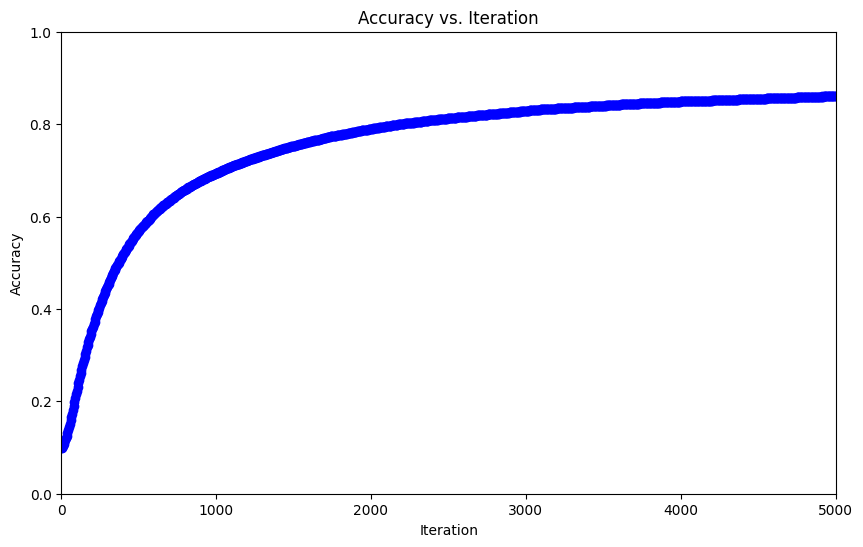

In [42]:
iterations, accuracies = zip(*accuracy_list)

plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim(0,1.0)
plt.xlim(0,5005)
plt.show()

In [36]:
def test_predictions(W1, b1, W2, b2, W3, b3, X_test, y_test):
    test = make_prediction(X_test, W1, b1, W2, b2, W3, b3)
    image = X_test.T
    print(test.shape)
    accuracy = accuracy_sc(test, y_test)
    print(f"Accuracy:{accuracy}")
    y_test_label = obtain_predictions(y_test)
    for i in range(10):
        print(test[i], y_test_label[i])
        print(image[i].shape)
        plot_image(image[i])

(1000,)
Accuracy:0.859
9 4
(784,)
(28, 28)


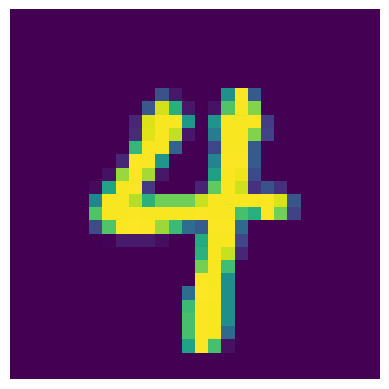

1 1
(784,)
(28, 28)


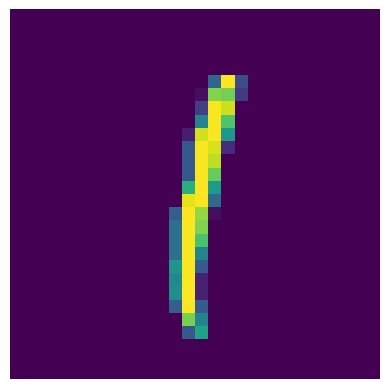

2 2
(784,)
(28, 28)


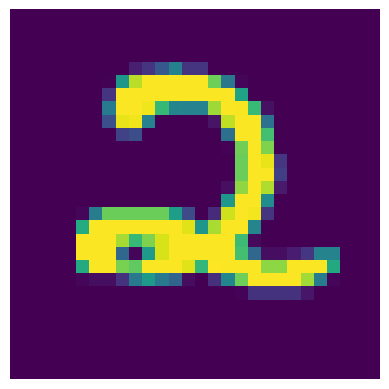

6 5
(784,)
(28, 28)


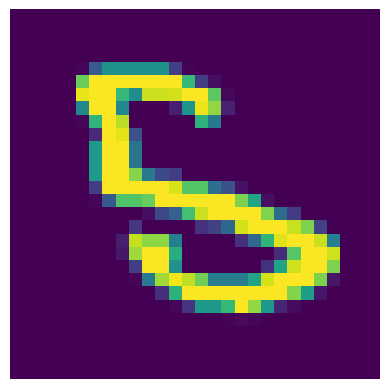

1 1
(784,)
(28, 28)


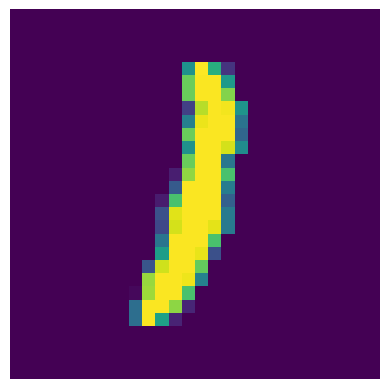

8 3
(784,)
(28, 28)


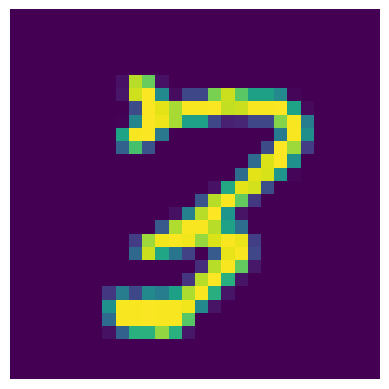

1 1
(784,)
(28, 28)


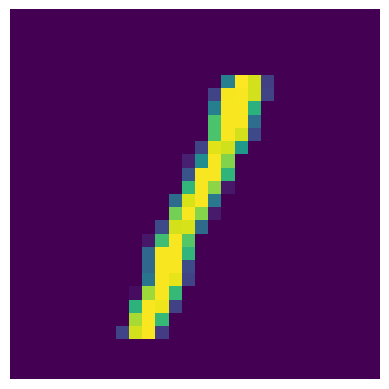

1 1
(784,)
(28, 28)


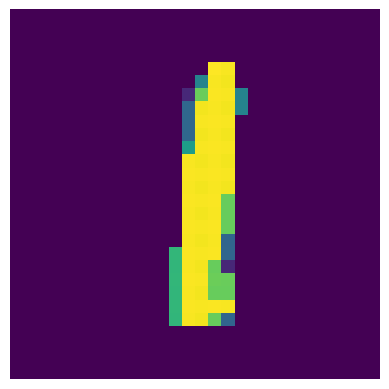

9 4
(784,)
(28, 28)


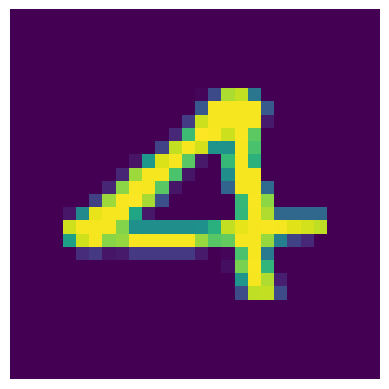

4 4
(784,)
(28, 28)


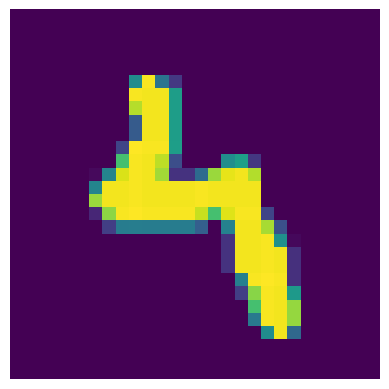

In [37]:
test_predictions(W1, b1, W2, b2, W3, b3, X_test, y_test)